In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random
random.seed(1)

# Numerical Integration Investigation

In this example, we will investigate a few different methods of numerical integration.  We will use the following function as our test case:

$$y = \frac{3}{2}(1-x^2)$$

We will integrate this function from $x=0$ to $x=1$.

The exact value of the integral is:

$$\int_0^1 y dx = 1$$

In [2]:
def generator_function(x):
    return 3.0/2.0*(1.0 - x*x)

## Rectangular Integration

The simplest method of numerical integration is the rectangular method.  In this method, we divide the interval into $n$ equal parts, and evaluate the function at the midpoint of each interval.  The area of each rectangle is then the function value at the midpoint times the width of the interval.  The total area is the sum of the areas of all the rectangles.  The error in this method is proportional to the width of the interval, so the error decreases as $n$ increases.  The error is also proportional to the second derivative of the function, so the error decreases as the function becomes smoother.

We will consider n values of $n$ from $10^2$ to $10^6$.

In [3]:
max_order = 6
min_order = 2
Iexact = 1.0

norders = max_order - min_order + 1

npts = np.zeros(norders)

enp = np.zeros(norders)
sum2 = np.zeros(norders)
esum2 = np.zeros(norders)

for j in range(min_order,max_order+1):
    npoints = 10**j
    # array to hold number of points
    npts[j-min_order]=npoints

    xlow = 0.0
    xhigh = 1.0
    dx = (xhigh-xlow)/npoints
        
    for i in range(0,int(npoints)):
        xval = xlow+i*(xhigh-xlow)/npoints+0.5*dx
        yval = generator_function(xval)
        sum2[j-min_order] += dx*yval
    
    esum2[j-min_order] += 2.0*np.abs(sum2[j-min_order]-Iexact)
    
    print("Integral = %.15f +/- %.15f for npoints = %d" %(sum2[j-min_order],esum2[j-min_order],npoints))
    print("Error = %f" %np.abs(esum2[j-min_order]))
    
    

Integral = 1.000012500000000 +/- 0.000025000000000 for npoints = 100
Error = 0.000025
Integral = 1.000000125000001 +/- 0.000000250000002 for npoints = 1000
Error = 0.000000
Integral = 1.000000001249998 +/- 0.000000002499996 for npoints = 10000
Error = 0.000000
Integral = 1.000000000012495 +/- 0.000000000024990 for npoints = 100000
Error = 0.000000
Integral = 1.000000000000201 +/- 0.000000000000401 for npoints = 1000000
Error = 0.000000


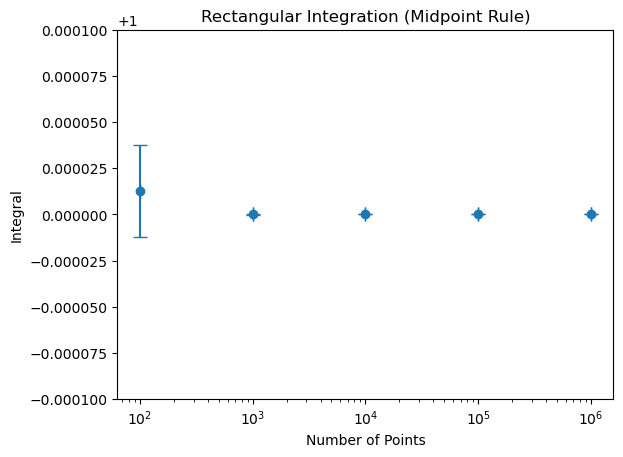

In [4]:
plt.errorbar(npts,sum2,xerr=enp,yerr=esum2,fmt='o',capsize=5)
plt.xscale("log")
plt.xlabel("Number of Points")
plt.ylabel("Integral")
plt.title("Rectangular Integration (Midpoint Rule)")
plt.ylim(0.9999,1.0001)
plt.show()

Slope = -2.000000


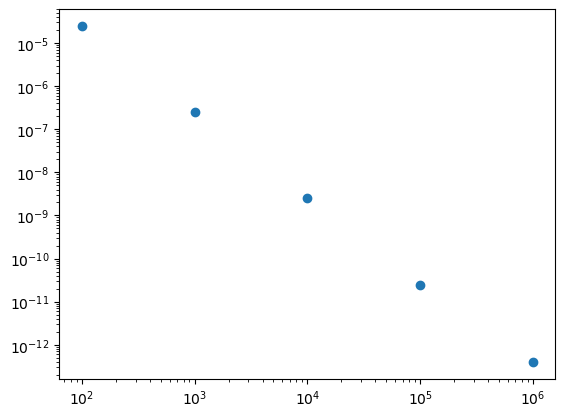

In [5]:
plt.plot(npts,esum2,'o')
plt.xscale("log")
plt.yscale("log")

slope = (np.log(esum2[1])-np.log(esum2[0]))/(np.log(npts[1])-np.log(npts[0]))
print("Slope = %f" %slope)